In [ ]:
pip install pdf2image

In [ ]:
pip install easyocr

In [ ]:
import easyocr
import numpy as np
import PIL

from PIL import ImageDraw
from pdf2image import convert_from_path

Langkah Preprocessing

In [ ]:
reader = easyocr.Reader(['id'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [ ]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.12).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
!wget https://media.neliti.com/media/publications/249244-none-837c3dfb.pdf

--2021-12-22 01:32:15--  https://media.neliti.com/media/publications/249244-none-837c3dfb.pdf
Resolving media.neliti.com (media.neliti.com)... 37.19.206.6, 2a02:6ea0:e200::2
Connecting to media.neliti.com (media.neliti.com)|37.19.206.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180156 (176K) [application/pdf]
Saving to: ‘249244-none-837c3dfb.pdf.1’

249244-none-837c3df 100%[===================>] 175.93K  --.-KB/s    in 0.05s   

2021-12-22 01:32:15 (3.31 MB/s) - ‘249244-none-837c3dfb.pdf.1’ saved [180156/180156]



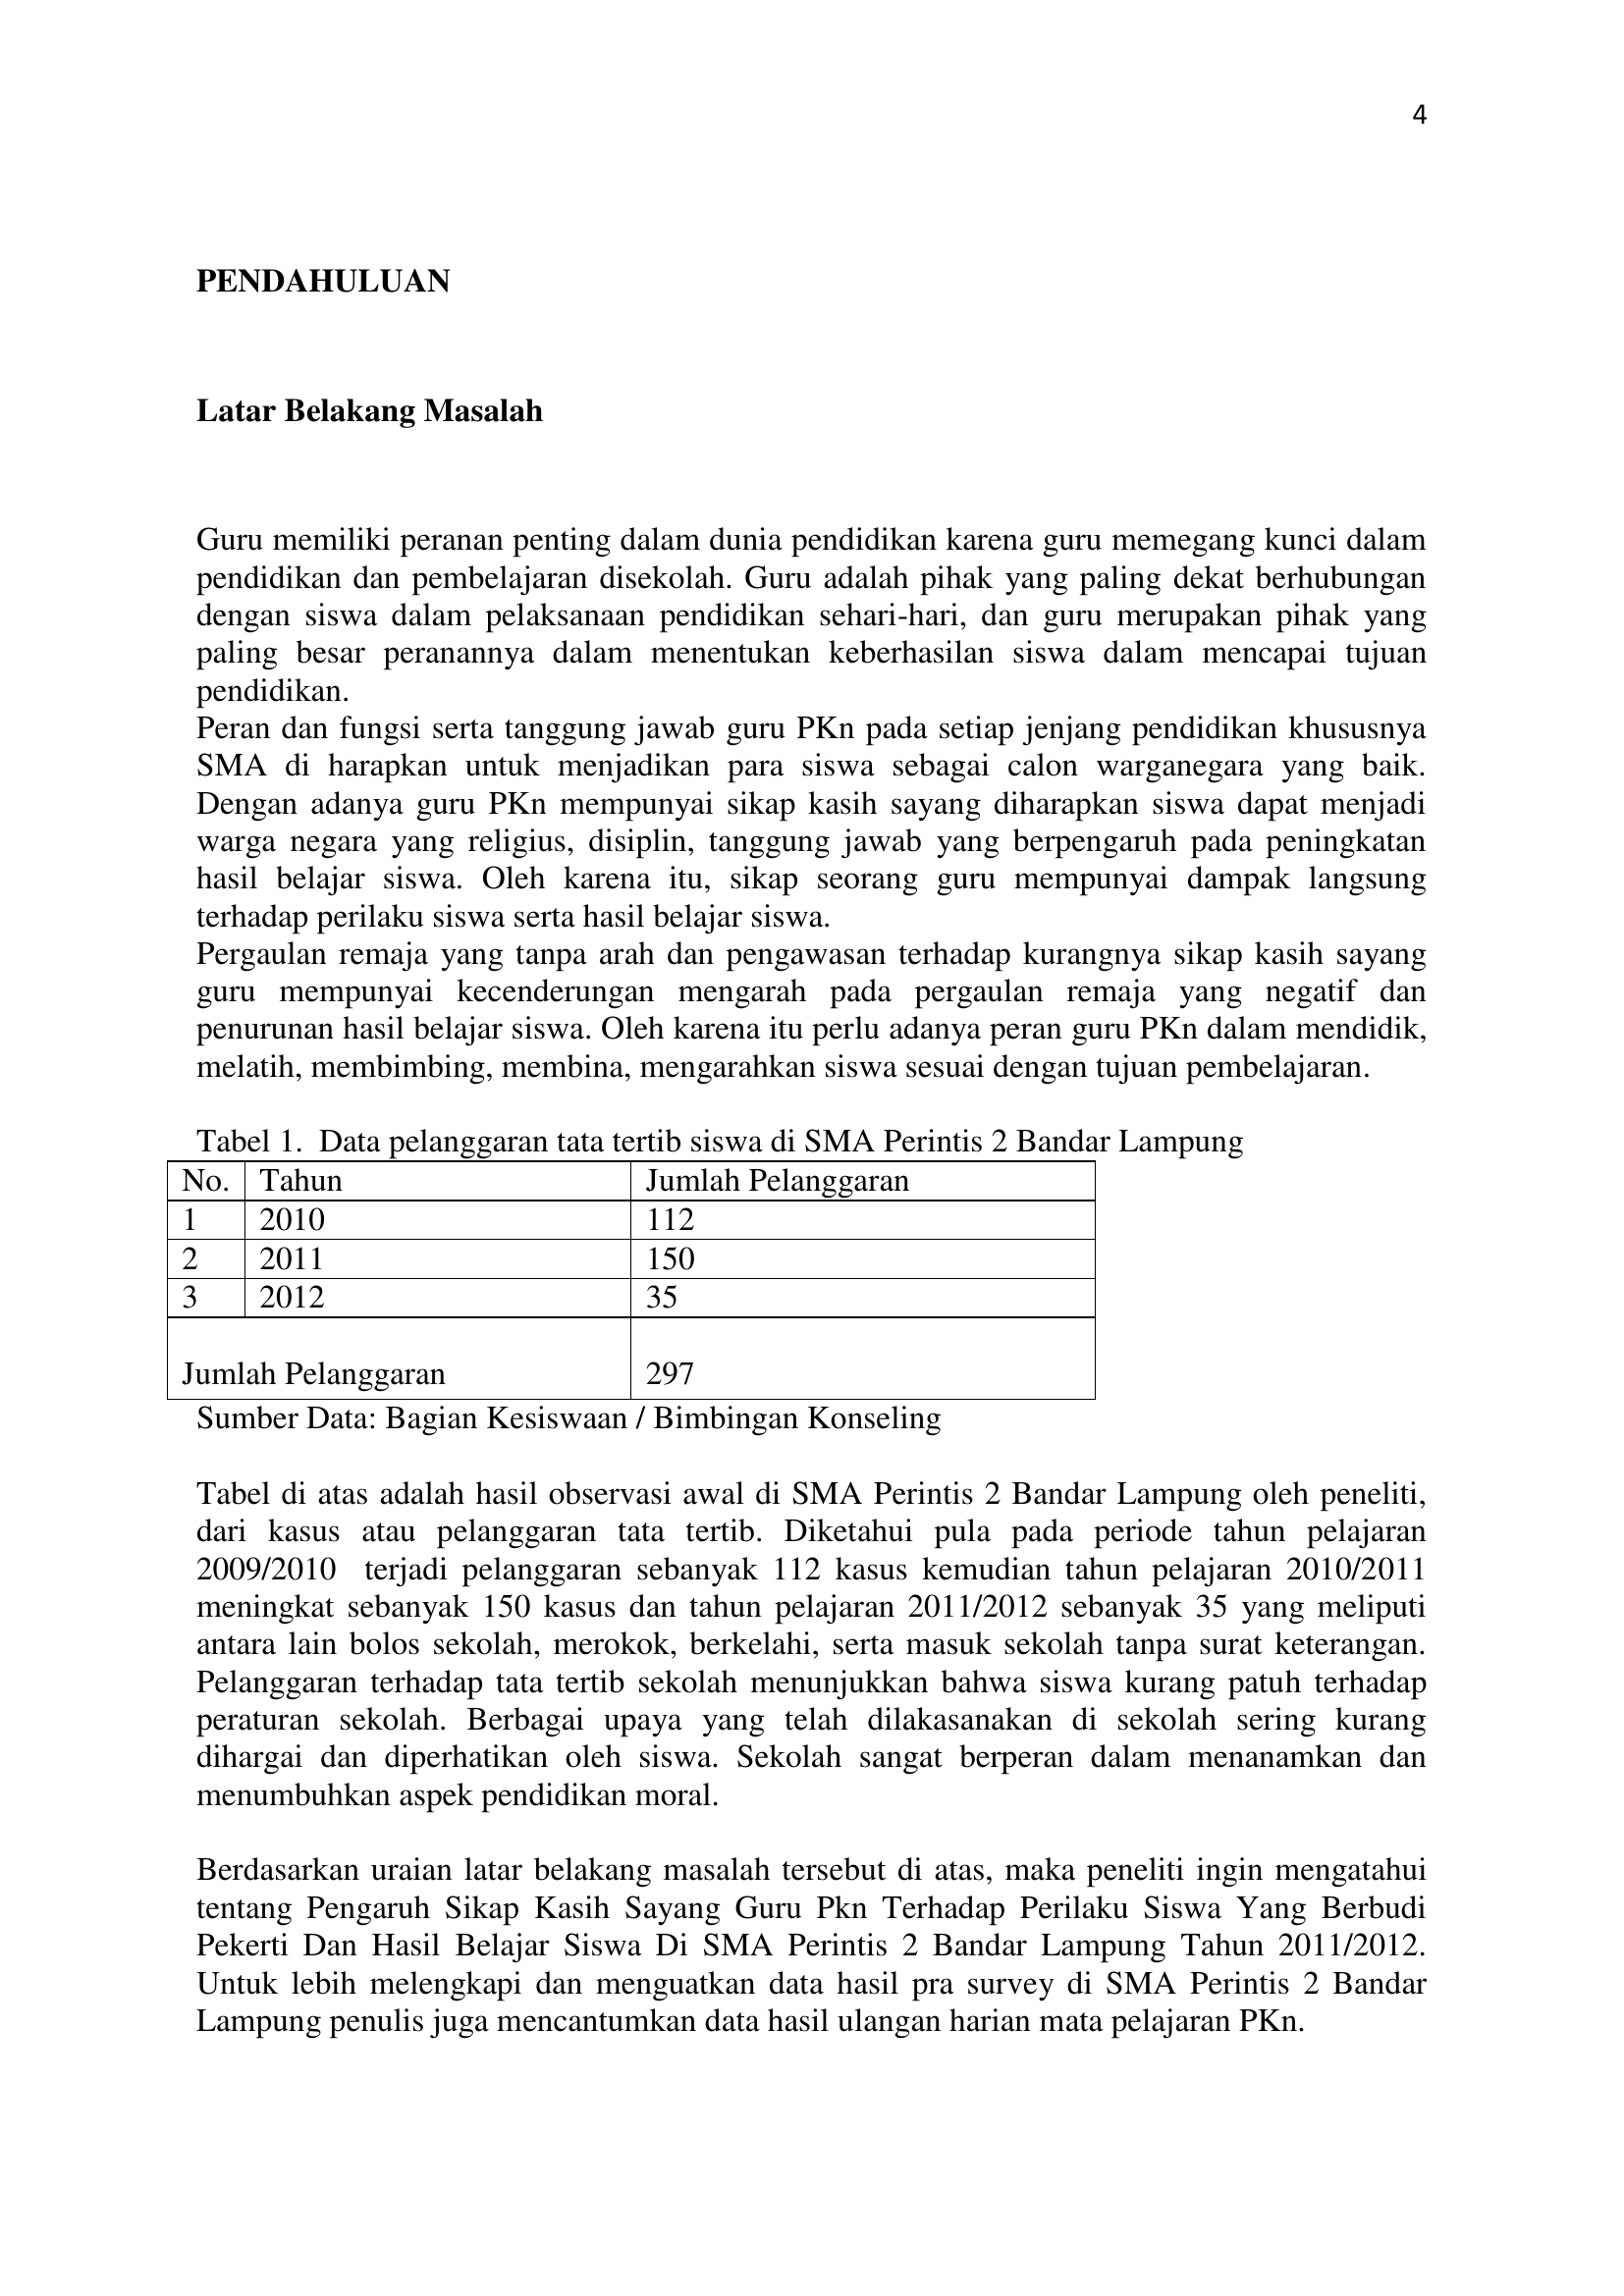

In [ ]:
images = (convert_from_path("249244-none-837c3dfb.pdf")[3])
images

In [ ]:
bounds = reader.readtext(np.array(images))
bounds

[([[197, 269], [463, 269], [463, 305], [197, 305]],
  'PENDAHULUAN',
  0.9988558816444296),
 ([[197, 398], [559, 398], [559, 443], [197, 443]],
  'Latar Belakang Masalah',
  0.9995031626525016),
 ([[197, 528], [1457, 528], [1457, 573], [197, 573]],
  'Guru memiliki peranan penting dalam dunia pendidikan karena guru memegang kunci dalam',
  0.8072212249785242),
 ([[192, 566], [747, 566], [747, 614], [192, 614]],
  'pendidikan dan pembelajaran disekolah.',
  0.9499187752774858),
 ([[754, 565], [1459, 565], [1459, 616], [754, 616]],
  'Guru adalah pihak yang paling dekat berhubungan',
  0.7343138341112695),
 ([[196, 603], [1291, 603], [1291, 655], [196, 655]],
  'dengan siswa dalam pelaksanaan pendidikan sehari-hari; dan guru merupakan',
  0.5733022106820043),
 ([[1385, 615], [1459, 615], [1459, 651], [1385, 651]],
  'yang',
  0.9998809099197388),
 ([[195, 647], [289, 647], [289, 689], [195, 689]],
  'paling',
  0.9999933326175573),
 ([[299, 649], [551, 649], [551, 689], [299, 689]],
  'b

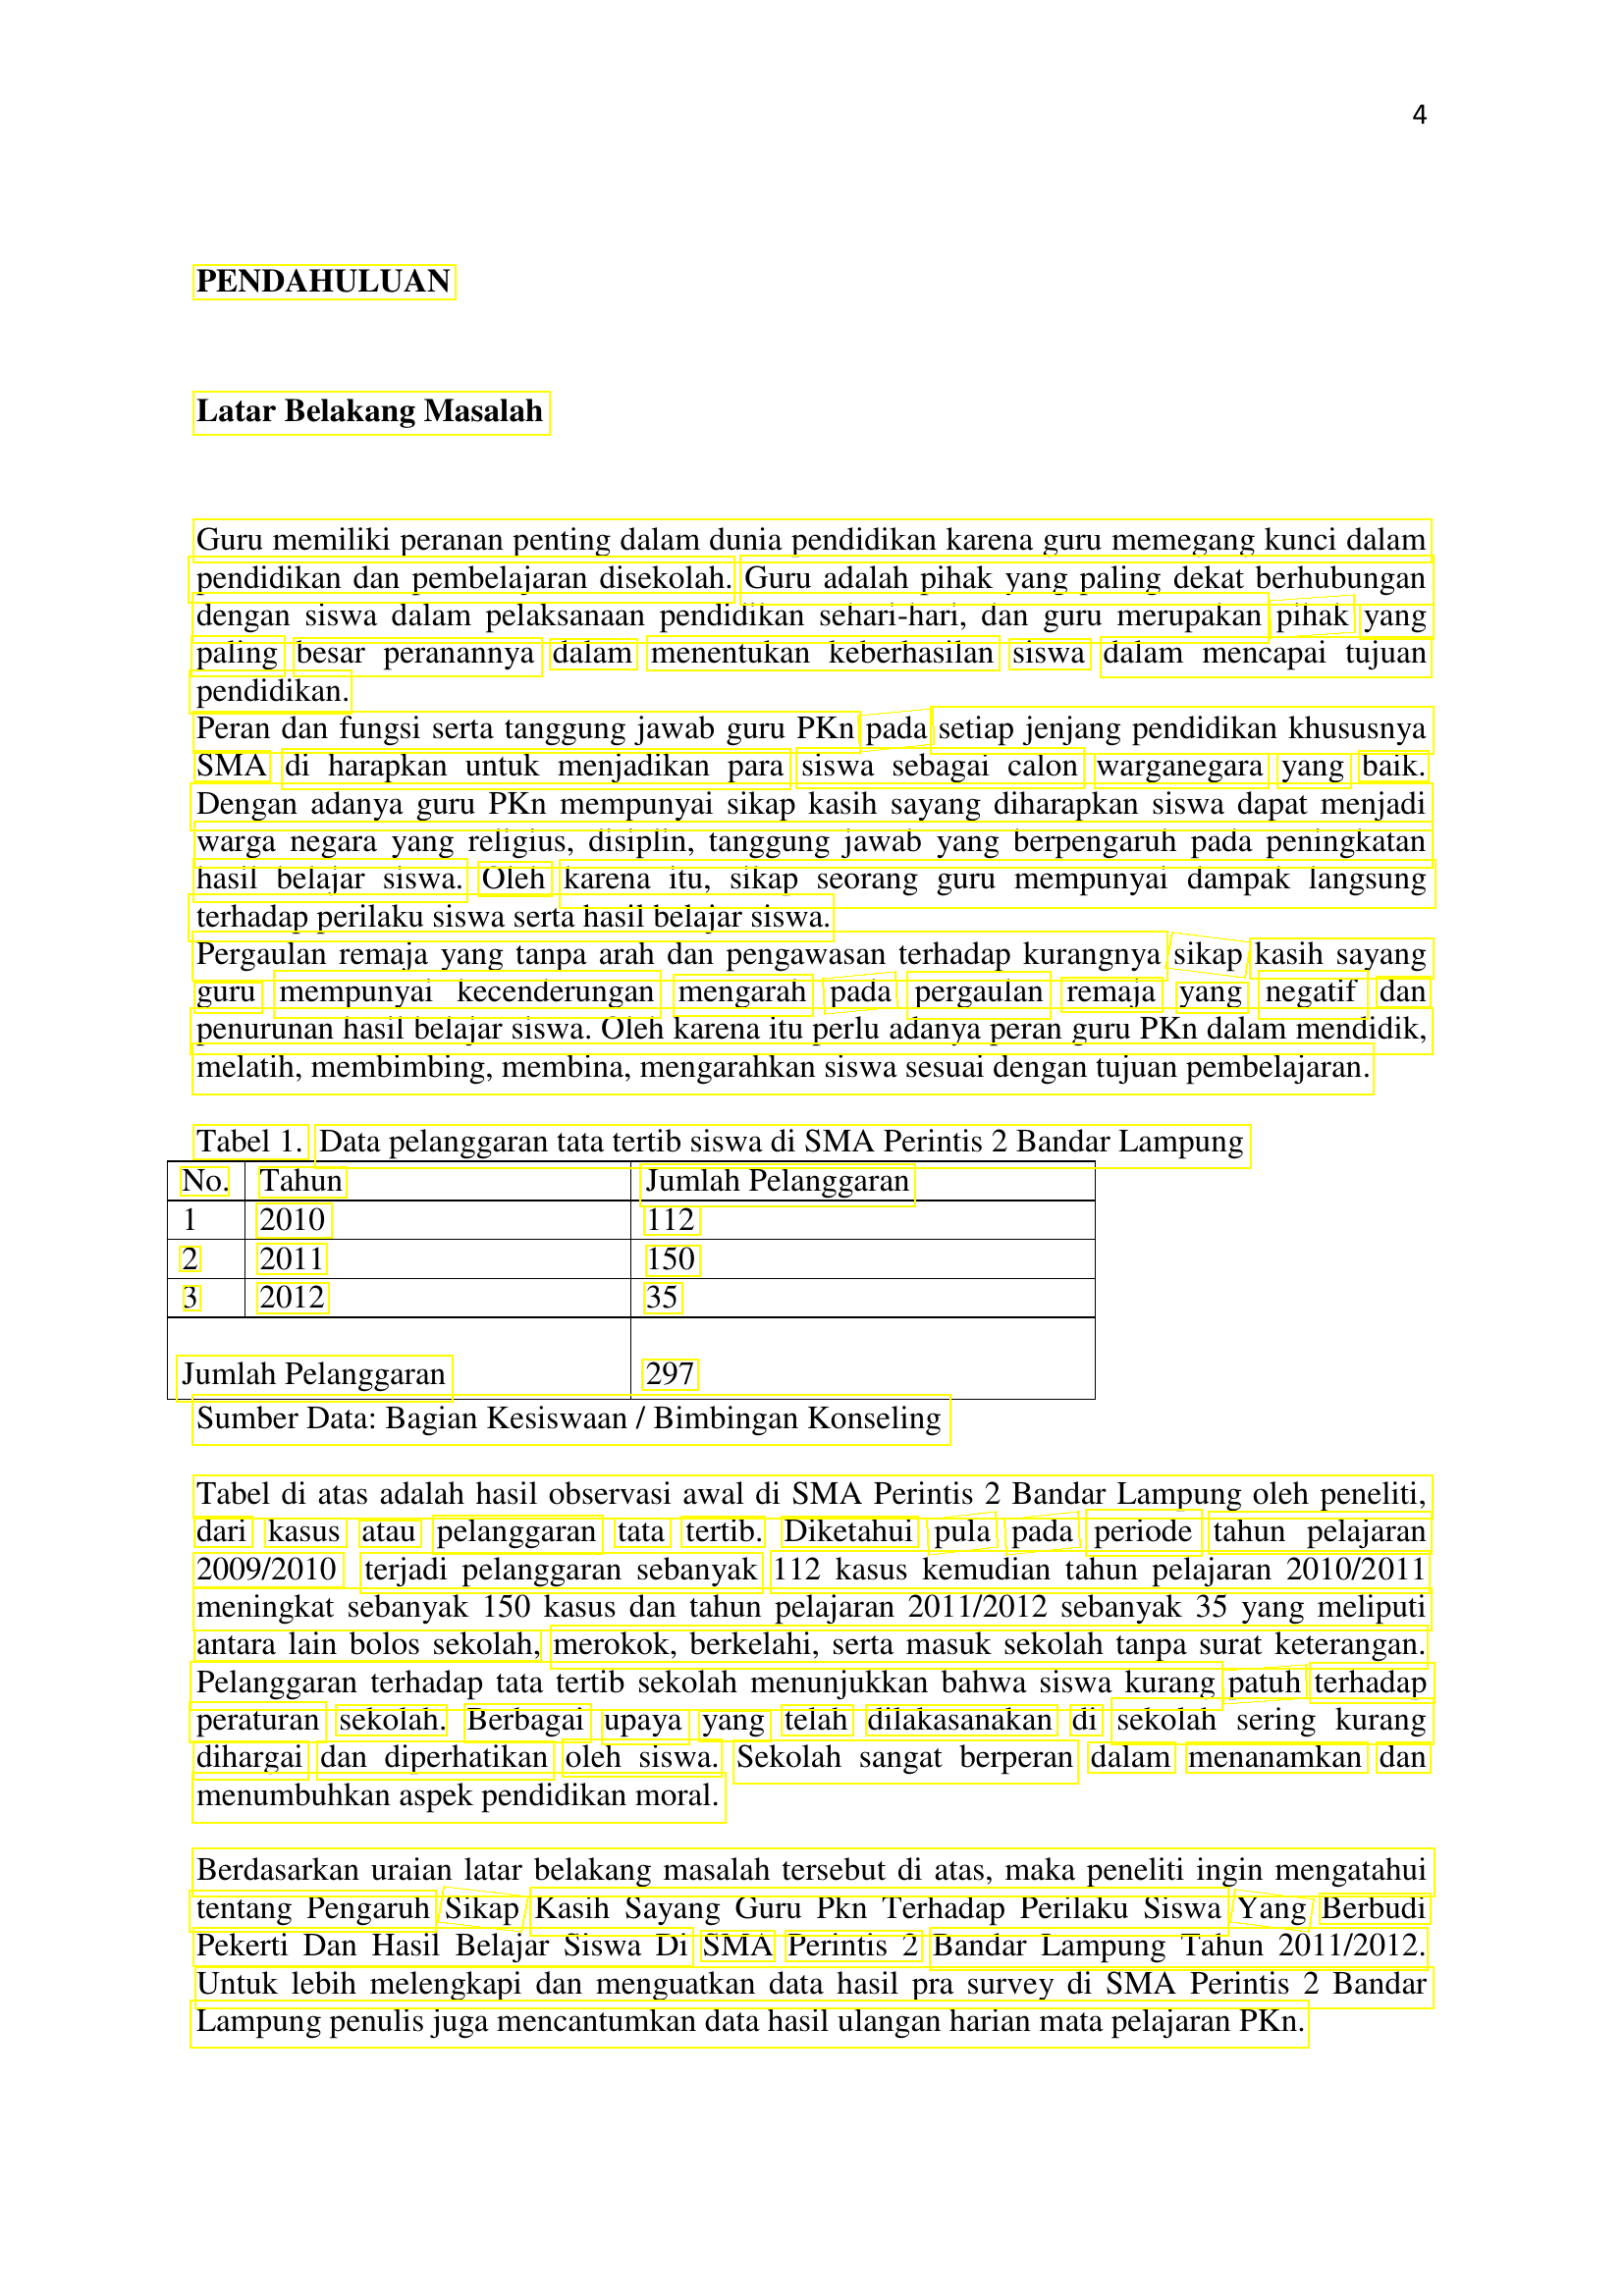

In [ ]:
def draw_boxes(image, bounds, color='yellow', width =2):
  draw = ImageDraw.Draw(image)
  for bound in bounds:
    p0, p1, p2, p3 = bound[0]
    draw.line([*p0, *p1, *p2, *p3, *p0], fill = color, width=width)
  return image

draw_boxes(images, bounds)

In [ ]:
text = ''
for i in range(len(bounds)):
  text = text + bounds [i][1] + " "

print(text)

PENDAHULUAN Latar Belakang Masalah Guru memiliki peranan penting dalam dunia pendidikan karena guru memegang kunci dalam pendidikan dan pembelajaran disekolah. Guru adalah pihak yang paling dekat berhubungan dengan siswa dalam pelaksanaan pendidikan sehari-hari; dan guru merupakan yang paling besar   peranannya dalam menentukan   keberhasilan siswa dalam   mencapai   tujuan pendidikan. Peran dan fungsi serta tanggung jawab guru PKn setiap jenjang pendidikan khususnya SMA di   harapkan  untuk   menjadikan   para siswa sebagai calon warganegara yang baik. Dengan adanya guru PKn mempunyai sikap kasih sayang diharapkan siswa dapat menjadi warga negara yang religius, disiplin; tanggung jawab yang berpengaruh pada peningkatan hasil   belajar  siswa. Oleh karena   itu, sikap seorang  guru   mempunyai   dampak   langsung terhadap perilaku siswa serta hasil belajar siswa. Pergaulan remaja yang tanpa arah dan pengawasan terhadap kurangnya kasih sayang guru mempunyai   kecenderungan mengarah perg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Algoritma TextRank

In [ ]:
import re
import pandas as pd


import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

nltk.download('punkt') 
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = text
sentences = []
for s in df:
    sentences.append(sent_tokenize(s))  


In [ ]:
sentences = [y for x in sentences for y in x]
sentences

['P',
 'E',
 'N',
 'D',
 'A',
 'H',
 'U',
 'L',
 'U',
 'A',
 'N',
 'L',
 'a',
 't',
 'a',
 'r',
 'B',
 'e',
 'l',
 'a',
 'k',
 'a',
 'n',
 'g',
 'M',
 'a',
 's',
 'a',
 'l',
 'a',
 'h',
 'G',
 'u',
 'r',
 'u',
 'm',
 'e',
 'm',
 'i',
 'l',
 'i',
 'k',
 'i',
 'p',
 'e',
 'r',
 'a',
 'n',
 'a',
 'n',
 'p',
 'e',
 'n',
 't',
 'i',
 'n',
 'g',
 'd',
 'a',
 'l',
 'a',
 'm',
 'd',
 'u',
 'n',
 'i',
 'a',
 'p',
 'e',
 'n',
 'd',
 'i',
 'd',
 'i',
 'k',
 'a',
 'n',
 'k',
 'a',
 'r',
 'e',
 'n',
 'a',
 'g',
 'u',
 'r',
 'u',
 'm',
 'e',
 'm',
 'e',
 'g',
 'a',
 'n',
 'g',
 'k',
 'u',
 'n',
 'c',
 'i',
 'd',
 'a',
 'l',
 'a',
 'm',
 'p',
 'e',
 'n',
 'd',
 'i',
 'd',
 'i',
 'k',
 'a',
 'n',
 'd',
 'a',
 'n',
 'p',
 'e',
 'm',
 'b',
 'e',
 'l',
 'a',
 'j',
 'a',
 'r',
 'a',
 'n',
 'd',
 'i',
 's',
 'e',
 'k',
 'o',
 'l',
 'a',
 'h',
 '.',
 'G',
 'u',
 'r',
 'u',
 'a',
 'd',
 'a',
 'l',
 'a',
 'h',
 'p',
 'i',
 'h',
 'a',
 'k',
 'y',
 'a',
 'n',
 'g',
 'p',
 'a',
 'l',
 'i',
 'n',
 'g',
 'd',
 'e'

In [ ]:
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

clean_sentences = [s.lower() for s in clean_sentences]

In [ ]:
stop_words = stopwords.words('indonesian')

In [ ]:
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [ ]:
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

clean_sentences

['p',
 'e',
 'n',
 'd',
 'a',
 'h',
 'u',
 'l',
 'u',
 'a',
 'n',
 'l',
 'a',
 't',
 'a',
 'r',
 'b',
 'e',
 'l',
 'a',
 'k',
 'a',
 'n',
 'g',
 'm',
 'a',
 's',
 'a',
 'l',
 'a',
 'h',
 'g',
 'u',
 'r',
 'u',
 'm',
 'e',
 'm',
 'i',
 'l',
 'i',
 'k',
 'i',
 'p',
 'e',
 'r',
 'a',
 'n',
 'a',
 'n',
 'p',
 'e',
 'n',
 't',
 'i',
 'n',
 'g',
 'd',
 'a',
 'l',
 'a',
 'm',
 'd',
 'u',
 'n',
 'i',
 'a',
 'p',
 'e',
 'n',
 'd',
 'i',
 'd',
 'i',
 'k',
 'a',
 'n',
 'k',
 'a',
 'r',
 'e',
 'n',
 'a',
 'g',
 'u',
 'r',
 'u',
 'm',
 'e',
 'm',
 'e',
 'g',
 'a',
 'n',
 'g',
 'k',
 'u',
 'n',
 'c',
 'i',
 'd',
 'a',
 'l',
 'a',
 'm',
 'p',
 'e',
 'n',
 'd',
 'i',
 'd',
 'i',
 'k',
 'a',
 'n',
 'd',
 'a',
 'n',
 'p',
 'e',
 'm',
 'b',
 'e',
 'l',
 'a',
 'j',
 'a',
 'r',
 'a',
 'n',
 'd',
 'i',
 's',
 'e',
 'k',
 'o',
 'l',
 'a',
 'h',
 '',
 'g',
 'u',
 'r',
 'u',
 'a',
 'd',
 'a',
 'l',
 'a',
 'h',
 'p',
 'i',
 'h',
 'a',
 'k',
 'y',
 'a',
 'n',
 'g',
 'p',
 'a',
 'l',
 'i',
 'n',
 'g',
 'd',
 'e',

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = '/content/drive/MyDrive/Colab Notebooks/glove.6B.100d.txt'

GloVe word embeddings adalah representasi vektor dari kata-kata. word embeddings akan digunakan untuk membuat vektor untuk kalimat.

In [ ]:
# Extract word vectors
word_embeddings = {}
f = open(glove_input_file, encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [ ]:
sentence_vectors = []
for i in clean_sentences:
    if len(i) != 0:
        v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
    else:
        v = np.zeros((100,))
    sentence_vectors.append(v)

Langkah selanjutnya adalah mencari kesamaan antar kalimat. Kami akan menggunakan cosine similarity  untuk menemukan kesamaan antara sepasang kalimat. 

In [ ]:
sim_mat = np.zeros([len(sentences), len(sentences)])
sim_mat.shape

(2196, 2196)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity 


In [ ]:
for i in range(len(sentences)):
    for j in range(len(sentences)):
        if i != j:
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]

print(sim_mat.shape)
sim_mat[:5,:5] 

(2196, 2196)


array([[0.        , 0.4861016 , 0.71362984, 0.46104604, 0.25184143],
       [0.4861016 , 0.        , 0.54734468, 0.57781321, 0.33791044],
       [0.71362984, 0.54734468, 0.        , 0.60852331, 0.25221273],
       [0.46104604, 0.57781321, 0.60852331, 0.        , 0.32835275],
       [0.25184143, 0.33791044, 0.25221273, 0.32835275, 0.        ]])

kita ubah matriks kesamaan sim_mat menjadi grafik. Simpul dari grafik ini akan mewakili kalimat dan ujungnya akan mewakili skor kesamaan antar kalimat. Pada grafik ini, kami akan menerapkan algoritma PageRank untuk sampai pada peringkat kalimat.

In [ ]:
import networkx as nx

nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)

In [ ]:
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)

In [ ]:
from gensim.summarization.summarizer import summarize

In [ ]:
print(summarize(text))

Dengan adanya guru PKn mempunyai sikap kasih sayang diharapkan siswa dapat menjadi warga negara yang religius, disiplin; tanggung jawab yang berpengaruh pada peningkatan hasil   belajar  siswa.
Oleh karena   itu, sikap seorang  guru   mempunyai   dampak   langsung terhadap perilaku siswa serta hasil belajar siswa.
Berdasarkan uraian latar belakang masalah tersebut di atas; maka peneliti ingin mengatahui tentang Pengaruh Kasih Sayang Guru Pkn Terhadap Perilaku Siswa Berbudi Pekerti Dan Hasil Belajar Siswa Di SMA Perintis 2 Bandar Lampung Tahun 2011/2012.
